# Lab 08 - Predicting the Sale Price of Houses

<b>Name: Aayan Verma</b>

NetID: aayanv2

---
embed-resources: true
---

## Introduction

Buying a house is the biggest decision a person can make in their life. It's a perfect milestone, provides enough space for a family, is a sign of success, and is a big investment. A house's value increases over time, meaning that a house bought in 1999 is worth significantly more now in 2025. In today's lab, we are developing a sale price model that will take a house's features to predict it's selling price. I am going to use a training set of data of houses from 2011 to create this model, and then use a test dataset to test its competence. At the end of the day, this model will allow online real estate aggregators to accurately predict the worth of a house with all its features.

## Methods

In [ ]:
# imports
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score, mean_absolute_percentage_error

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text

: 

First thing we should do is load in both our training and testing datasets.

### Data

In [2]:
# load data
housing_train = pd.read_parquet(
    "https://cs307.org/lab/data/housing-train.parquet",
)
housing_test = pd.read_parquet(
    "https://cs307.org/lab/data/housing-test.parquet",
)

#### Response  
**SalePrice**  
- `[int64]`: Sale price

---

#### Features

**Order**  
- `[int64]`: Observation number

**PID**  
- `[int64]`: Parcel identification number — can be used with city web site for parcel review

**MS_SubClass**  
- `[int64]`: Identifies the type of dwelling involved in the sale

**MS_Zoning**  
- `[object]`: Identifies the general zoning classification of the sale

**Lot_Frontage**  
- `[float64]`: Linear feet of street connected to property

**Lot_Area**  
- `[int64]`: Lot size in square feet

**Street**  
- `[object]`: Type of road access to property

**Alley**  
- `[object]`: Type of alley access to property

**Lot_Shape**  
- `[object]`: General shape of property

**Land_Contour**  
- `[object]`: Flatness of the property

**Utilities**  
- `[object]`: Type of utilities available

**Lot_Config**  
- `[object]`: Lot configuration

**Land_Slope**  
- `[object]`: Slope of property

**Neighborhood**  
- `[object]`: Physical locations within Ames city limits

**Condition_1**  
- `[object]`: Proximity to various conditions

**Condition_2**  
- `[object]`: Proximity to various conditions (if more than one is present)

**Bldg_Type**  
- `[object]`: Type of dwelling

**House_Style**  
- `[object]`: Style of dwelling

**Overall_Qual**  
- `[int64]`: Rates the overall material and finish of the house

**Overall_Cond**  
- `[int64]`: Rates the overall condition of the house

**Year_Built**  
- `[int64]`: Original construction date

**Year_Remod_Add**  
- `[int64]`: Remodel date (same as construction date if no remodeling or additions)

**Roof_Style**  
- `[object]`: Type of roof

**Roof_Matl**  
- `[object]`: Roof material

**Exterior_1st**  
- `[object]`: Exterior covering on house

**Exterior_2nd**  
- `[object]`: Exterior covering on house (if more than one material)

**Mas_Vnr_Type**  
- `[object]`: Masonry veneer type

**Mas_Vnr_Area**  
- `[float64]`: Masonry veneer area in square feet

**Exter_Qual**  
- `[object]`: Evaluates the quality of the material on the exterior

**Exter_Cond**  
- `[object]`: Evaluates the present condition of the material on the exterior

**Foundation**  
- `[object]`: Type of foundation

**Bsmt_Qual**  
- `[object]`: Evaluates the height of the basement

**Bsmt_Cond**  
- `[object]`: Evaluates the general condition of the basement

**Bsmt_Exposure**  
- `[object]`: Refers to walkout or garden level walls

**BsmtFin_Type_1**  
- `[object]`: Rating of basement finished area

**BsmtFin_SF_1**  
- `[float64]`: Type 1 finished square feet

**BsmtFin_Type_2**  
- `[object]`: Rating of basement finished area (if multiple types)

**BsmtFin_SF_2**  
- `[float64]`: Type 2 finished square feet

**Bsmt_Unf_SF**  
- `[float64]`: Unfinished square feet of basement area

**Total_Bsmt_SF**  
- `[float64]`: Total square feet of basement area

**Heating**  
- `[object]`: Type of heating

**Heating_QC**  
- `[object]`: Heating quality and condition

**Central_Air**  
- `[object]`: Central air conditioning

**Electrical**  
- `[object]`: Electrical system

**1st_Flr_SF**  
- `[int64]`: First Floor square feet

**2nd_Flr_SF**  
- `[int64]`: Second floor square feet

**Low_Qual_Fin_SF**  
- `[int64]`: Low quality finished square feet (all floors)

**Gr_Liv_Area**  
- `[int64]`: Above grade (ground) living area square feet

**Bsmt_Full_Bath**  
- `[float64]`: Basement full bathrooms

**Bsmt_Half_Bath**  
- `[float64]`: Basement half bathrooms

**Full_Bath**  
- `[int64]`: Full bathrooms above grade

**Half_Bath**  
- `[int64]`: Half baths above grade

**Bedroom_AbvGr**  
- `[int64]`: Bedrooms above grade (does not include basement bedrooms)

**Kitchen_AbvGr**  
- `[int64]`: Kitchens above grade

**Kitchen_Qual**  
- `[object]`: Kitchen quality

**TotRms_AbvGrd**  
- `[int64]`: Total rooms above grade (does not include bathrooms)

**Functional**  
- `[object]`: Home functionality (assume typical unless deductions are warranted)

**Fireplaces**  
- `[int64]`: Number of fireplaces

**Fireplace_Qu**  
- `[object]`: Fireplace quality

**Garage_Type**  
- `[object]`: Garage location

**Garage_Yr_Blt**  
- `[float64]`: Year garage was built

**Garage_Finish**  
- `[object]`: Interior finish of the garage

**Garage_Cars**  
- `[float64]`: Size of garage in car capacity

**Garage_Area**  
- `[float64]`: Size of garage in square feet

**Garage_Qual**  
- `[object]`: Garage quality

**Garage_Cond**  
- `[object]`: Garage condition

**Paved_Drive**  
- `[object]`: Paved driveway

**Wood_Deck_SF**  
- `[int64]`: Wood deck area in square feet

**Open_Porch_SF**  
- `[int64]`: Open porch area in square feet

**Enclosed_Porch**  
- `[int64]`: Enclosed porch area in square feet

**3Ssn_Porch**  
- `[int64]`: Three season porch area in square feet

**Screen_Porch**  
- `[int64]`: Screen porch area in square feet

**Pool_Area**  
- `[int64]`: Pool area in square feet

**Pool_QC**  
- `[object]`: Pool quality

**Fence**  
- `[object]`: Fence quality

**Misc_Feature**  
- `[object]`: Miscellaneous feature not covered in other categories

**Misc_Val**  
- `[int64]`: Value of miscellaneous feature

**Mo_Sold**  
- `[int64]`: Month Sold

**Yr_Sold**  
- `[int64]`: Year Sold

**Sale_Type**  
- `[object]`: Type of sale

**Sale_Condition**  
- `[object]`: Condition of sale


In [3]:
# summary statistics
housing_train.shape

(1875, 82)

Based on this information above, we can see that there are <b>1875</b> different houses available for us to use to train our model, each house with <b>81</b> different features recorded aobut them.

Additionally, because of all these features, we can create a correlation matrix to see which features affect our response variable of Sale Price the most.

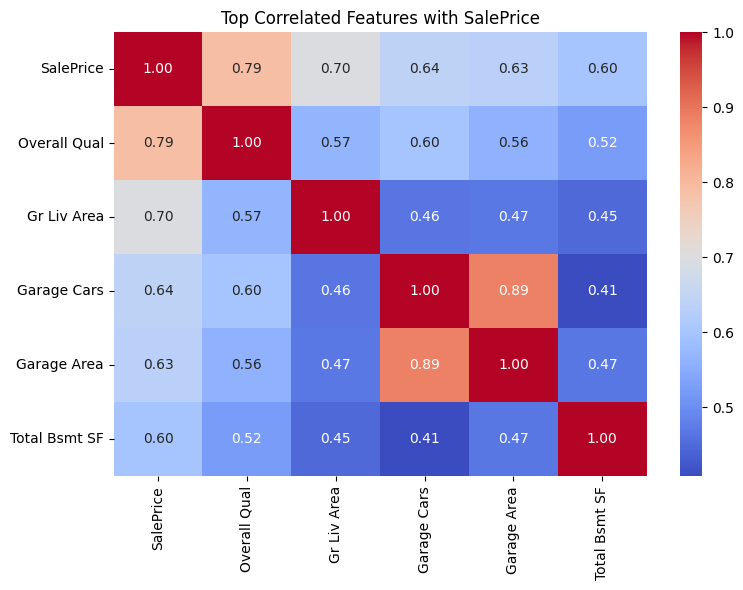

In [55]:
# exploratory visualization

numeric_df = housing_train.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()['SalePrice'].sort_values(ascending=False)

top_corr_features = corr.head(6).index
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df[top_corr_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Top Correlated Features with SalePrice')
plt.tight_layout()
plt.show()


From this, we can see that Overall Quality, Gr Liv Area, Garage Cars, Garage Area, and Total Bsmt SF are the top 5 most correlated variables to Sale Price.

Now we can go and begin creating our model.

### Models

First we have to split the features and response from each other, and then separate the numeric features from the categorical ones too. 

In [36]:
# create X and y for train dataset
X_train = housing_train.drop("SalePrice", axis=1)
y_train = housing_train["SalePrice"]

# create X and y for test dataset
X_test = housing_test.drop("SalePrice", axis=1)
y_test = housing_test["SalePrice"]

numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(exclude=['int64', 'float64']).columns

Now we can start developing the model.

In [56]:
# process data for ML

numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler()),
    ]
)
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="infrequent_if_exist", sparse_output=False))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("NumericProcessing", numeric_transformer, numeric_features),
        ("CategoricalProcessing", categorical_transformer, categorical_features)
    ]
)

# train models
pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("model", HistGradientBoostingRegressor()),
    ]
)

param_grid = [
    {
        "model__max_depth" : list(range(1, 10, 1))
    }
]

model = GridSearchCV(
    pipeline, 
    param_grid, 
    cv = 3,
    scoring='neg_root_mean_squared_error'
)


model.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('NumericProcessing',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF...
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object'))])),
                                       ('model',
                                        HistGradientBoostingRegressor())]),
             param_grid=[{'model__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
             scoring='neg_root_mean_squared_error')

## Results

In [50]:
# report model metrics
print(mean_absolute_percentage_error(y_test, model.predict(X_test)))

0.08326576981775803


The model that I created was able to achieve a mean absolute percentage error of <b>0.0832</b> on the test dataset. This indicates that the model's prediction deviates from the actual sale price value by only 8%, which indicates a relatively strong model.

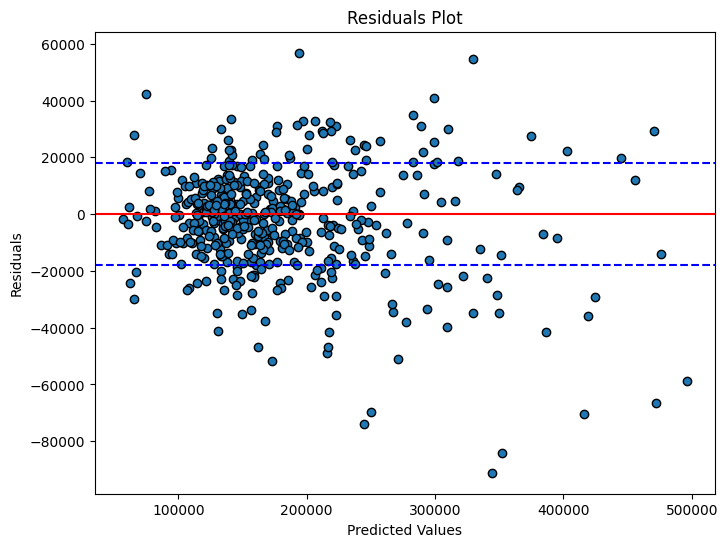

In [61]:
# summary figure
residuals = y_test - model.predict(X_test)

mean = y_train.mean()
percentage = mean * 0.1

plt.figure(figsize=(8, 6))
plt.scatter(model.predict(X_test), residuals, edgecolors="k")
plt.axhline(y=0, color="r", linestyle="solid")
plt.axhline(y=percentage, color="b", linestyle="--")
plt.axhline(y=-percentage, color="b", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

From the above plot, we can see how the model fares with predicting sale price. Each blue dot is the residual, or difference, between a predicted sale price and its actual sale price. The red line represents fully accurate predictions and the blue line represents 10% of the mean price of the actual sale price values. The blue dots that are within the boundaries of the blue line indicate which predictions were within 10% of the actual sale price. From the plot itself, we can see that a solid amount are within that boundary.

In [51]:
# serialize model
dump(model, "housing.joblib")

['housing.joblib']

## Discussion

To recap what was done before getting into the analysis, a real estate listing aggregator came to me to develop a model that could accurately predict a houses sale price based on a variety of features. I had access to a 2011 training dataset to create my model, which I cleaned, preprocessed, and made with a Histogram-based Gradient Boosting Regression Tree. The resulting model had a mean absolute percentage error of <b>0.0832</b>, which indicates a relatively strong model with close predictions for houses.

Based on the fact that the model achieved an MAPE of 0.0832, we can say that each prediction may be off by an average of 8% from its actual price. This normally would mean the model is very strong, however we are dealing with the prices of houses well into 6 figures. A number like 8% could indicate 5 figure differences, which may be a lot for most homeowners. As such, if this model is used for the listing aggregator, I would recommend that the predictions be trusted, but overvalue or undervalue the price by roughly $10,000 or so. To make the model a little bit more accurate, I would say to add more houses to the dataset that the model is trained on. Otherwise, it's a strong model that can be deployed very soon.